A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The solution is divided into the following sections:

1. Data Understanding and EDA
2. Data Cleaning
3. Data Preparing
4. Model Building and Evaluation
5. Subjective Questions

## 1. Data Understanding and EDA

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset and viewing the basic info**

In [3]:
housing = pd.read_csv("train.csv", encoding = 'utf-8')

In [4]:
# Head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Shape of the dataset
housing.shape

(1460, 81)

In [6]:
# Info of dataset features
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Describe of the numeric variables
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As 'MSSubClass' is a categorical variable, converting the type to object.

In [8]:
housing.MSSubClass = housing.MSSubClass.astype('object')

Dropping the 'Id' column as this feature will not have any significance in building the model

In [9]:
housing.drop(['Id'], axis =1, inplace = True)

Seperating the numeric and categorical features for data understanding.

In [10]:
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

housing_categorical = housing.select_dtypes(include=['object'])

In [11]:
# List of numeric columns
housing_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
# List of categorical columns
housing_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Finding the correlation between numeric features
corr = housing_numeric.corr()
corr

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


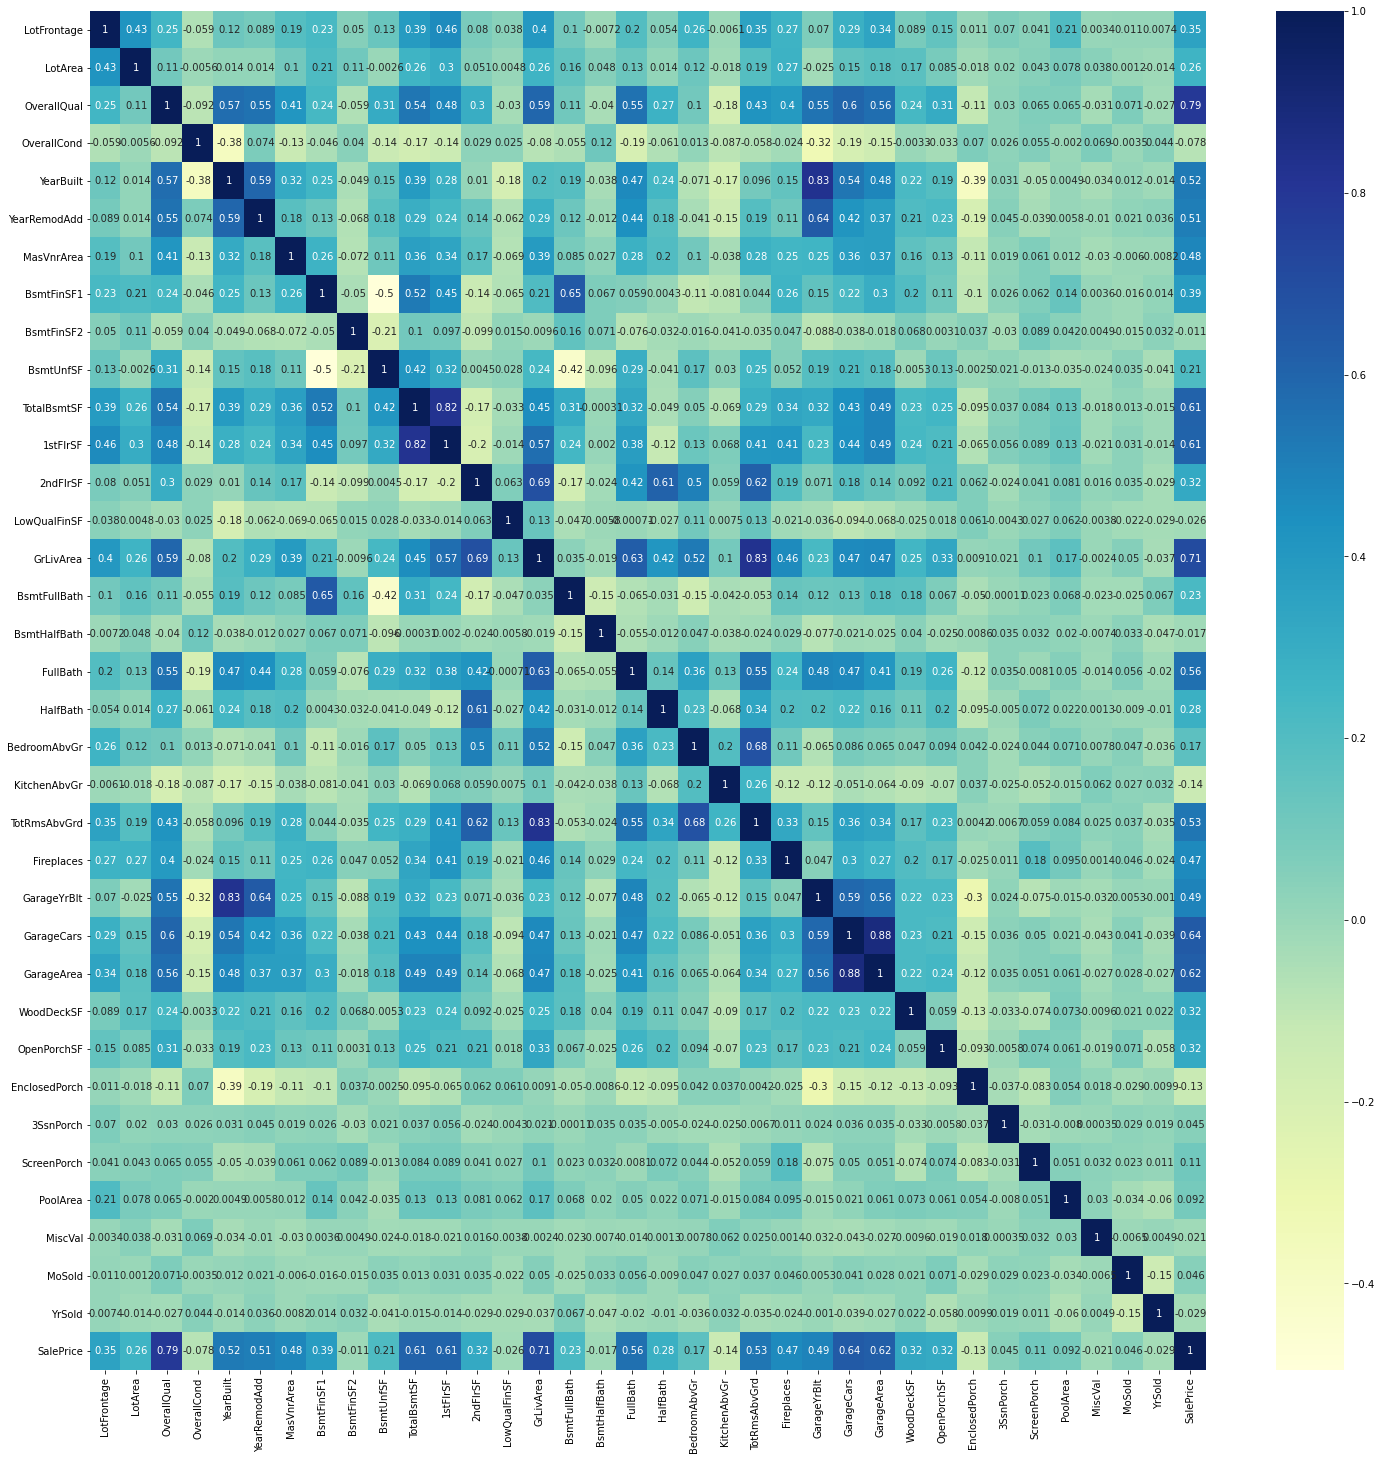

In [14]:
# Plotting correlations on a heatmap

# Figure size
plt.figure(figsize=(25,25))

# Heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

**Observations:**
1. TotRmsAbvGrd is highly correlated with GrLivArea. 
2. GarageCars and GarageArea have strong correaltion score of 0.88. Makes sense that with more cars we need more garage area. Hence we can drop one of the columns.
3. GarageYrBlt and YearBuilt also has stron correlation.
4. Similarly with TotalBsmtSF and 1stFlrSF.

We will drop the highly correlated as part of the Data cleaning step. Lets make note of this correlations for now.

Let's understand the relation between our dependent variable 'SalePrice' and other categorical variables

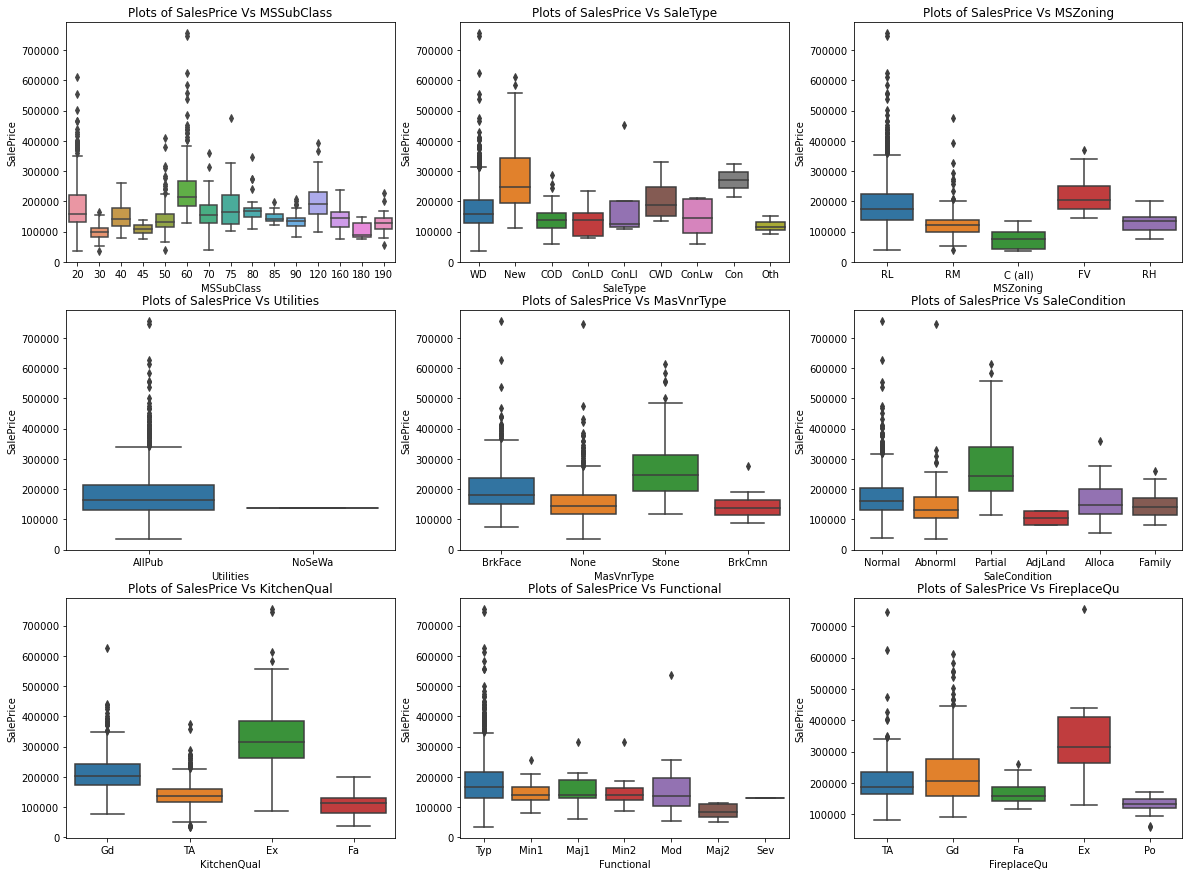

In [15]:
plt.figure(figsize=(20, 15))
plt.title("Plots of SalesPrice against other categorical features")
plt.subplot(3,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs MSSubClass")
plt.subplot(3,3,2)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs SaleType")
plt.subplot(3,3,3)
sns.boxplot(x = 'MSZoning',y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs MSZoning")
plt.subplot(3,3,4)
sns.boxplot(x = 'Utilities',y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs Utilities")
plt.subplot(3,3,5)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs MasVnrType")
plt.subplot(3,3,6)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs SaleCondition")
plt.subplot(3,3,7)
sns.boxplot(x = 'KitchenQual',y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs KitchenQual")
plt.subplot(3,3,8)
sns.boxplot(x = 'Functional',y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs Functional")
plt.subplot(3,3,9)
sns.boxplot(x = 'FireplaceQu',y = 'SalePrice', data = housing)
plt.title("Plots of SalesPrice Vs FireplaceQu")
plt.show()

**Observations:**
1. KitchenQual as Excellent, Partially finished homes and New SAletypes has higher Sale Prices.
2. Excellent Fireplace quality and floating village residential types have better sale prices.
3. Fucntional state and MasVnrType doesn't have much influence on sale price.

**Understanding the dependent feature for our model - SalePrice**

In [16]:
#describe
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

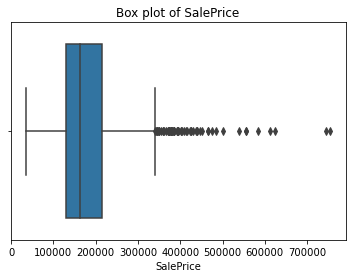

In [17]:
#Boxplot
sns.boxplot('SalePrice', data = housing)
plt.title("Box plot of SalePrice")
plt.show()

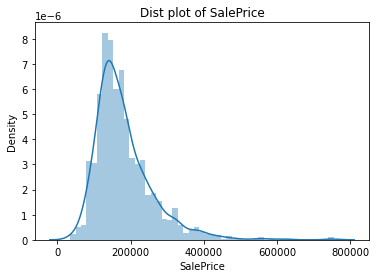

In [18]:
# Distribution plot
sns.distplot(housing['SalePrice'])
plt.title("Dist plot of SalePrice")
plt.show()

Clearly, from the above plots the data looks to be left skewed and we say a lot of outliers in the data.

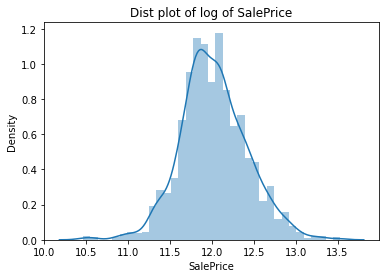

In [19]:
# Distribution plot of log of Sale Price
sns.distplot(np.log1p(housing['SalePrice']))
plt.title("Dist plot of log of SalePrice")
plt.show()

Post performing the log on the feature, the feature dataset has become normally distributed.

In [20]:
# Updating the feature with logarithmic value
housing['SalePrice'] = np.log1p(housing['SalePrice'])

## 2. Data Cleaning

**2.1 Checking the data missing percentage of each feature**

In [21]:
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
MSSubClass        0.00
Length: 80, dtype: float64

Dropping the columns with more than 80% missing data

In [22]:
housing.columns[round(housing.isnull().sum()/len(housing)*100,2) > 80]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [23]:
# Dropping columns
housing.drop(['Alley', 'PoolQC','Fence',  'MiscFeature'], axis =1, inplace = True)

In [24]:
# shape
housing.shape

(1460, 76)

In [25]:
# checking rest of the features with missing values
housing.columns[round(housing.isnull().sum()/len(housing)*100,2) != 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are categorical variables. Hence replacing NA with None.
Since 'Electrical' doesn't take 'None' as valid value, we will treat it seperately.

In [26]:
# List of categorical features to replace NA values
replace_with_None = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [27]:
# Replacing with None
housing[replace_with_None] = housing[replace_with_None].replace(np.nan, 'None')

In [28]:
#Understanding the 'Electrical' column
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [29]:
# Since majority of Electrical are of type 'SBrkr', lets impute the missing values with the same.
housing['Electrical'] = housing['Electrical'].replace(np.nan, housing['Electrical'].value_counts().index[0])

Let's deal with handling the missing values of numerical columns.

In [30]:
# Features with missing values
housing.columns[round(housing.isnull().sum()/len(housing)*100,2) != 0]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

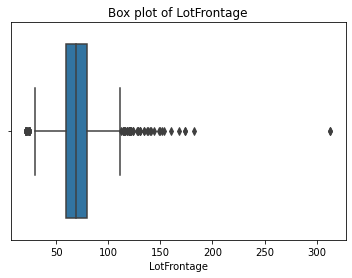

In [31]:
# Box plot of LotFrontage
sns.boxplot('LotFrontage', data = housing)
plt.title("Box plot of LotFrontage")
plt.show()

In [32]:
# As there are outliers in data, imputing with median value.
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

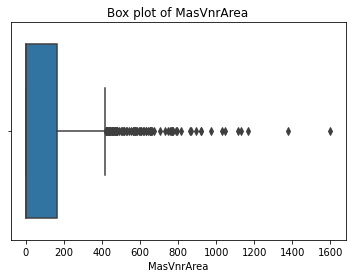

In [33]:
# Box plot of MasVnrArea
sns.boxplot('MasVnrArea', data = housing)
plt.title("Box plot of MasVnrArea")
plt.show()

In [34]:
# As there are outliers in data, imputing with median value.
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [35]:
# Value count of GarageYrBlt
housing.GarageYrBlt.astype('category').value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1933.0     1
1908.0     1
1906.0     1
1900.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [36]:
# Replace the missing value with zero.
housing['GarageYrBlt']=housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype('int64')

### 2.2 Dropping the columns with very little variance in data

If 85% of the feature value is dominated by a single value, we can drop such features, because there will be very little variance that will induced by other values. 

#### Dropping the categorical columns with very little variance in data

In [37]:
# Fetching the categorical columns
housing_categorical = housing.select_dtypes(include=['object'])

In [38]:
#Function to get the columns with little variance
def dropColumnsWithLowVariance():
    columns_to_be_dropped = []
    #categorical_columns = housing.select_dtypes(include=['object'])
    for col in housing_categorical.columns.values:
        if(housing[col].value_counts().max() >= 0.85*len(housing)):
            columns_to_be_dropped.append(col)
    return columns_to_be_dropped


In [39]:
# Function call
dropColumnsWithLowVariance()

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [40]:
# Dropping the columns
housing.drop(dropColumnsWithLowVariance(), axis = 1, inplace = True)

In [41]:
# Shape after dropping the categorical columns with low variance
housing.shape

(1460, 58)

#### Dropping the numeric columns with very little variance in data

In [42]:
# Fetching the numerical columns
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

In [43]:
#Function to get the columns with little variance
def dropNumColumnsWithLowVariance():
    columns_to_be_dropped = []
    #categorical_columns = housing.select_dtypes(include=['object'])
    for col in housing_numeric.columns.values:
        if(housing[col].value_counts().max() >= 0.85*len(housing)):
            columns_to_be_dropped.append(col)
    return columns_to_be_dropped

In [44]:
# Dropping the columns
housing.drop(dropNumColumnsWithLowVariance(), axis = 1, inplace = True)

In [45]:
# Shape after dropping the numerical columns with low variance
housing.shape

(1460, 49)

### 2.3 Check for duplicates

In [46]:
housing[housing.duplicated(keep = 'last')]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice


There are no duplicate entries in the dataset.

### 2.4 Outlier Treatment

Let's check for outliers in the data and clean such values. Having outliers can have adverse affects on the final model.

In [47]:
# Fetching the numerical columns
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])

In [48]:
# Values
housing_numeric.columns.values

array(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SalePrice'], dtype=object)

In [49]:
# Grab the data for various percentiles 
housing.describe(percentiles=[0.01, 0.05, 0.10,.25,.5,.75,.90,.95,.99])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,12.024057
std,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,0.399449
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
1%,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,11.031872
5%,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,519.300000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,11.385103
10%,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,74.900000,636.900000,...,5.000000,0.000000,1928.000000,1.000000,240.000000,0.000000,0.000000,3.000000,2006.000000,11.575675
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,11.775105
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,12.001512
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,12.273736


From the above data, the below columns have outliers at their higher end. We will work on removing them.

In [50]:
outlier_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']

In [51]:
#Function to remove outliers above 99th percentile
def removeOutliers():
    global housing
    for i in outlier_columns:
        value_99_percentile = housing[i].quantile(0.99)
        housing = housing[housing[i] < value_99_percentile]
        #print(i, housing.shape)

From the above data, the below columns have outliers at their lower end. We will work on removing them.

In [52]:
outlier_columns_low = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageArea', 'SalePrice']

In [53]:
#Function to remove outliers below 1st percentile
def removeOutliers_low():
    global housing
    for i in outlier_columns_low:
        value_01_percentile = housing[i].quantile(0.01)
        housing = housing[housing[i] > value_01_percentile]
        #print(i, housing.shape)

In [54]:
#Function calls
removeOutliers()

removeOutliers_low()

### 2.5 Dropping highly correlated features

In [55]:
# plotting correlations on a heatmap
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
corr = housing_numeric.corr()
corr

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.466391,0.093546,-0.048092,0.069972,-0.013045,0.202498,0.076608,0.067667,0.213347,...,0.224068,0.148330,0.013114,0.191042,0.241834,0.027742,0.100702,0.011379,0.011292,0.241320
LotArea,0.466391,1.000000,0.057683,-0.005385,0.007587,-0.043481,0.104127,0.116288,0.006297,0.177553,...,0.280532,0.219034,-0.017723,0.141748,0.194291,0.112645,0.054968,-0.029039,-0.014375,0.271684
OverallQual,0.093546,0.057683,1.000000,-0.222267,0.579927,0.512838,0.317280,0.050870,0.271887,0.380755,...,0.325368,0.305274,0.524568,0.539585,0.457376,0.149589,0.335769,0.064017,-0.002994,0.788897
OverallCond,-0.048092,-0.005385,-0.222267,1.000000,-0.441938,0.010657,-0.135155,-0.019888,-0.194590,-0.264590,...,-0.091709,-0.054043,-0.373604,-0.282144,-0.223394,-0.016660,-0.116299,-0.004558,0.072844,-0.151039
YearBuilt,0.069972,0.007587,0.579927,-0.441938,1.000000,0.621384,0.247979,0.175653,0.146806,0.386575,...,0.039824,0.078890,0.839163,0.544407,0.465704,0.223142,0.301563,0.005362,0.000504,0.631729
YearRemodAdd,-0.013045,-0.043481,0.512838,0.010657,0.621384,1.000000,0.085765,0.038016,0.158056,0.223517,...,0.094498,0.024576,0.633626,0.433630,0.356864,0.202150,0.280438,0.011386,0.050036,0.570914
MasVnrArea,0.202498,0.104127,0.317280,-0.135155,0.247979,0.085765,1.000000,0.168816,0.086329,0.298718,...,0.247705,0.215111,0.186211,0.309911,0.305370,0.084453,0.173933,0.032386,0.019602,0.363129
BsmtFinSF1,0.076608,0.116288,0.050870,-0.019888,0.175653,0.038016,0.168816,1.000000,-0.665086,0.336353,...,-0.121447,0.128095,0.100978,0.114177,0.181668,0.140952,0.039565,-0.014078,0.036904,0.239023
BsmtUnfSF,0.067667,0.006297,0.271887,-0.194590,0.146806,0.158056,0.086329,-0.665086,1.000000,0.387183,...,0.210770,0.015728,0.160556,0.207948,0.153881,-0.080633,0.117343,0.047559,-0.035051,0.160817
TotalBsmtSF,0.213347,0.177553,0.380755,-0.264590,0.386575,0.223517,0.298718,0.336353,0.387183,1.000000,...,0.096966,0.179499,0.305439,0.387515,0.421238,0.116540,0.181043,0.024551,0.016965,0.499666


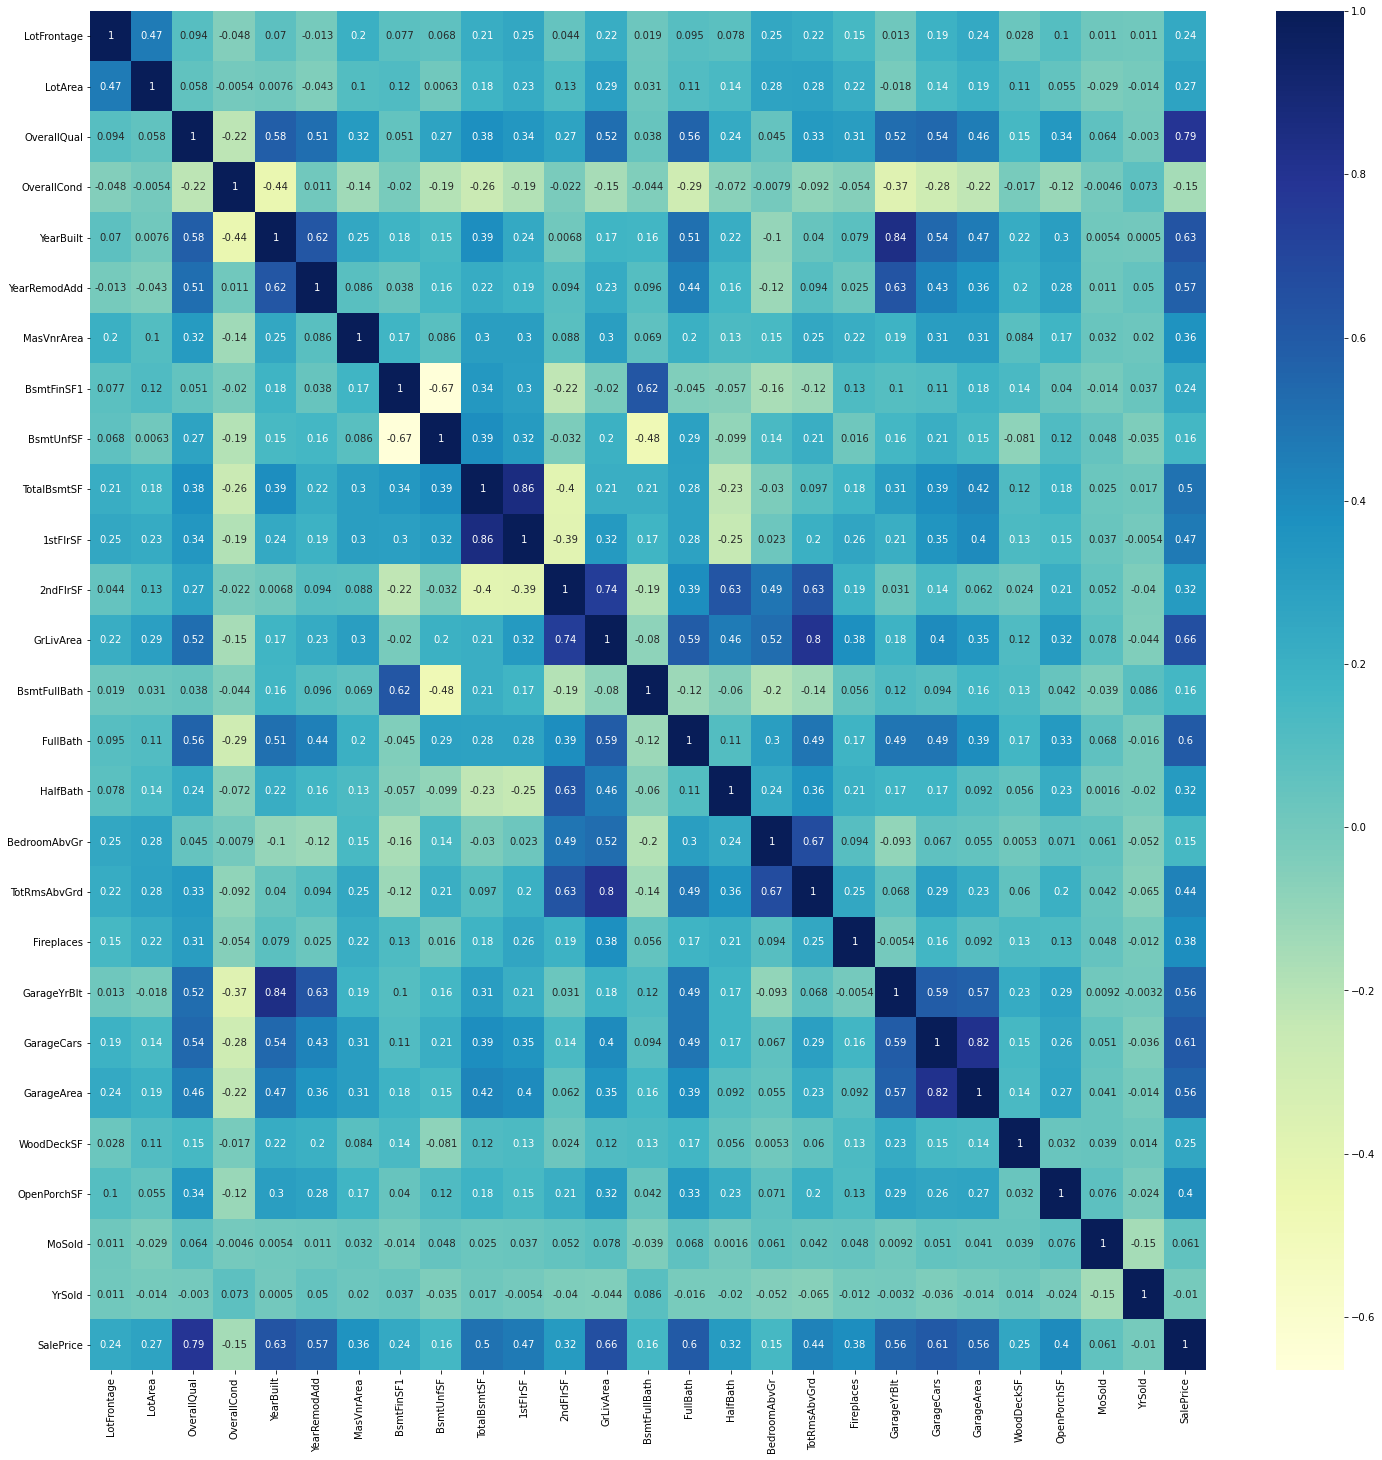

In [56]:
# figure size
plt.figure(figsize=(25,25))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

**Observations:**

1. TotalBsmt and 1stFlrSF are highly correlated.
2. GarageCars and GarageArea has high correlation score. Same with YearBlt and GarageYrBlt
3. GrLiveArea and TotalRoomsAbGrd has strong correlation.

In [57]:
# Dropping the highly correlated features.
housing.drop(['GrLivArea', 'GarageCars', '1stFlrSF', 'GarageYrBlt'], axis = 1, inplace = True)

In [58]:
# Shape of the dataset
housing.shape

(1111, 45)

## 3. Data Preparing

### 3.1 Creating derived columns

As we have 2 columns speaking about Year built and Year of remodelling. Let's use these 2 to fetch if it is a remodelled property.

In [59]:
# Fucntion for fetching remodelled property
def isRemodelledProperty(x):
    if(x['YearBuilt'] == x['YearRemodAdd']):
        return 0
    else:
        return 1
    

In [60]:
# Creating a new feature
housing['IsRemodelled'] = housing.apply(lambda x: isRemodelledProperty(x), axis=1)

Creating a derived feature for age of the house.

In [61]:
# Fucntion for fetching house age
def houseAge(x):
    if(x['IsRemodelled'] == 0):
        return x['YrSold'] - x['YearBuilt']
    else:
        return x['YrSold'] - x['YearRemodAdd']

In [62]:
# Creating a new feature
housing['HouseAge'] = housing.apply(lambda x: houseAge(x), axis=1)

In [63]:
# Dropping the below features as we have already derived new features from these features
housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold'], axis = 1, inplace = True)

In [64]:
# Shape of the dataset
housing.shape

(1111, 43)

### 3.2 Creating dummy variables for categorical variables

In [65]:
# Get the categorical variables
housing_categorical = housing.select_dtypes(include=['object'])

In [66]:
# Column values
values = housing.columns.values
print(values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'LotShape' 'LotConfig'
 'Neighborhood' 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond'
 'RoofStyle' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'Foundation' 'BsmtQual' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinSF1' 'BsmtUnfSF' 'TotalBsmtSF' 'HeatingQC' '2ndFlrSF'
 'BsmtFullBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'SaleCondition' 'SalePrice'
 'IsRemodelled' 'HouseAge']


In [67]:
# Deleting the dependent feature from the list
values = np.delete(values, len(values)-3)

In [68]:
# Dataset of independent features
X = housing.loc[:, values]

In [69]:
# Dataset of dependent feature
y = housing['SalePrice']

In [70]:
housing_categorical = X.select_dtypes(include=['object'])
#housing_categorical.head()

In [71]:
#Creating dummies for the categorical variables
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [72]:
# Drop the main categorical columns for which we created dummies. 
X = X.drop(list(housing_categorical.columns), axis=1)

In [73]:
# Concat the dummy variable features to independent features set
X = pd.concat([X, housing_dummies], axis=1)

In [74]:
# Final shape of our dataset
X.shape

(1111, 157)

### 3.3 Scaling the features

In [75]:
# Scaling the features.
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=157)

As we will perform k-fold cross validation we can scale the entire dataset, even before splitting into train and test datasets.

### 3.4 Splitting the dataset into train and test datasets

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

### 4.1 Linear Regression model

Creating a linear regression model with all the independent features

In [77]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [78]:
# Fetching the coefficients and intercept values.
print(lm.intercept_)
print(lm.coef_)

-200759116.4433595
[ 3.45508116e-03  1.47569575e-02  5.56358936e-02  2.37175025e-02
  6.07091866e-03  2.36430972e-03 -1.52464061e-02  8.63797160e-02
  8.89687740e-02  2.37174076e-03  1.29285554e-02  1.22308043e-02
 -3.48227026e-03  1.77194481e-02  1.13909115e-02  2.94498817e-02
  9.73881840e-03  4.86629950e-03 -9.11804876e-04 -1.81831233e-02
 -1.94543059e-02 -1.82689004e-03 -8.09657161e-03  1.17768444e-02
  3.28140546e-02  1.18176099e-02  4.87213759e-03 -1.70497184e-02
 -1.55006778e-02 -2.03690160e+11  1.62625384e-02  6.71779291e-03
  5.33424703e-03 -3.68935094e-03  4.60496453e-02  1.57424141e-02
  8.31955818e-02  5.04502108e-02  2.79903140e-03 -1.17399856e-03
  1.67927385e-03  5.74482522e-03 -9.54985951e-03 -1.23128712e-03
 -1.81271481e-03  3.14239507e-03  1.58255048e-02  4.93129411e-03
 -8.93311986e-04  2.90043672e-02 -1.64350708e-02 -1.98042932e-03
  1.01878983e-02 -2.11031698e-03 -5.71225255e-03 -1.61742166e-02
 -8.71767966e-03 -3.98406786e-03  6.18199448e-03  7.89928093e-03
 -3.43

In [79]:
# Predicted values on the train and test datasets
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [80]:
# Function to derive the metrics
def metrics(y_train, y_pred_train, y_test, y_pred_test):
    metric = {}
    r2_train_lr = r2_score(y_train, y_pred_train)
    metric['R-squared train'] = r2_train_lr
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    metric['R-squared test'] = r2_test_lr
    
    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    metric['RSS train'] = rss1_lr
    
    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    metric['RSS test'] = rss2_lr
    
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    metric['MSE train'] = mse_train_lr**0.5
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric['MSE test'] = mse_test_lr**0.5
    
    return metric

In [81]:
#Fetch the metrics
m1 = metrics(y_train, y_pred_train, y_test, y_pred_test)
print(m1)

{'R-squared train': 0.9278753190190369, 'R-squared test': -9.770054220232267e+20, 'RSS train': 4.908895907323613, 'RSS test': 2.6514236921937723e+22, 'MSE train': 0.07948430883187474, 'MSE test': 8909766712.99833}


**Observations:**

1. R-squared on train data is very high but on the test set is very low. It means we have a overfitted model.
2. R2 on test set is negative. It happens only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
3. Mean Squared Error is also very high on the test data.

### 4.2 Ridge regression

As we have a overfit model, let's try to reduce the complexity of the model by regularising it.

We will try Ridge regression to regularise our model.

In [82]:
# List of alphas to tune our model
# Higher value of alpha will lead to underfitting, 
# Lower value of alpha will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# Fit the model
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# Best value of alpha for the model
print(model_cv_ridge.best_params_)

{'alpha': 100}


In [84]:
# MSE train and test scores for different values of alpha
model_cv_ridge_results = pd.DataFrame(model_cv_ridge.cv_results_)
model_cv_ridge_results = model_cv_ridge_results[model_cv_ridge_results['param_alpha']<=500]
model_cv_ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
25,100,-0.062291,-0.076251,1
24,50,-0.060395,-0.076311,2
23,20,-0.058881,-0.076591,3
22,10,-0.058208,-0.076804,4
21,9,-0.058130,-0.076824,5
20,8,-0.058050,-0.076847,6
19,7,-0.057965,-0.076874,7
18,6,-0.057875,-0.076902,8
17,5,-0.057784,-0.076972,9
16,4,-0.057688,-0.077072,10


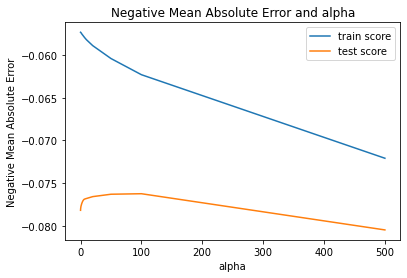

In [85]:
# Plotting the mean test and train scores for various alpha 
model_cv_ridge_results['param_alpha'] = model_cv_ridge_results['param_alpha'].astype('float64')

# plotting
plt.plot(model_cv_ridge_results['param_alpha'], model_cv_ridge_results['mean_train_score'])
plt.plot(model_cv_ridge_results['param_alpha'], model_cv_ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### 4.2.1 Building the Ridge regression model with best alpha value 

In [86]:
alpha = 100.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.89720492e-03  1.36140918e-02  5.18767565e-02  1.71352290e-02
  8.93664802e-03  1.85178717e-02  3.49508492e-03  5.06990864e-02
  3.09988771e-02  5.95781368e-03  1.63484183e-02  1.56016624e-02
  3.59064404e-03  1.88628167e-02  1.00239300e-02  2.85942317e-02
  9.30102161e-03  9.38337195e-03  1.09164012e-03 -1.92125401e-02
 -1.85480146e-02 -7.94408598e-04 -5.46722867e-03 -3.14942893e-03
  1.14884143e-02  5.67282791e-03  2.62672526e-03 -4.41495433e-03
 -8.49962054e-03 -9.34913527e-03 -7.07743669e-05 -9.68188035e-03
  2.38857652e-03 -6.91579618e-03  7.84118740e-03 -2.17137062e-03
  1.21362713e-02 -8.57482434e-03  3.39227023e-03 -1.10536265e-04
  2.04106721e-05  6.15544713e-03 -8.30653276e-03 -2.33681101e-03
 -4.60019271e-04  1.83231417e-03  8.65273477e-03  4.28620458e-03
 -2.36391093e-03  2.40819300e-02 -1.49573454e-02 -4.10780167e-03
  1.55937605e-03 -5.11667378e-03 -4.08682021e-03 -1.27962304e-02
 -3.06203202e-03 -1.24505067e-04  8.54118634e-03  1.17479471e-02
 -7.65419281e-03  6.23706

**Most important predictor variables from the model**

In [87]:
ridge_1 = pd.DataFrame(list(zip(X_train.columns.values, ridge.coef_)), columns=['Features', 'Coefficients'])

ridge_1['Abs_Coeffcients'] = ridge_1['Coefficients'].apply(lambda x: abs(x))

ridge_1 = ridge_1.sort_values(by='Abs_Coeffcients', ascending = False)
# Top 5 significant features
ridge_1.head()

,Features,Coefficients,Abs_Coeffcients
2,OverallQual,0.051877,0.051877
7,TotalBsmtSF,0.050699,0.050699
8,2ndFlrSF,0.030999,0.030999
15,GarageArea,0.028594,0.028594
49,Neighborhood_Crawfor,0.024082,0.024082


In [88]:
#Number of features with non-zero coefficient
ridge_1 = ridge_1[ridge_1.Coefficients != 0]
ridge_1.shape

(157, 3)

In [89]:
# Predicted values on the train and test datasets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [90]:
#Fetch the metrics
m2 = metrics(y_train, y_pred_train, y_test, y_pred_test)
print(m2)

{'R-squared train': 0.9182641059392651, 'R-squared test': 0.8714013870461199, 'RSS train': 5.563047078739668, 'RSS test': 3.4899438783367236, 'MSE train': 0.08461470764581476, 'MSE test': 0.10222002625452227}


**Observations:**

1. Regularization has a great affect on the model and we could achieve very good R-squred for test data.
2. MSE for test data has also improved significantly.

### 4.3 Lasso  Regression

In [91]:
# List of alphas to tune our model
# Higher value of alpha will lead to underfitting, 
# Lower value of alpha will not handle the overfitting
lasso = Lasso()

params = {'alpha': [0.00001,0.0001, 0.0009, 0.001, 0.0025, 0.005, 0.0075, 0.009, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#Fit the model
model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0009, 0.001, 0.0025, 0.005,
                                   0.0075, 0.009, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Best value of alpha for the model
print(model_cv_lasso.best_params_)

{'alpha': 0.0025}


In [93]:
# MSE train and test scores for different values of alpha

model_cv_lasso_results = pd.DataFrame(model_cv_lasso.cv_results_)
model_cv_lasso_results = model_cv_lasso_results[model_cv_lasso_results['param_alpha']<=500]
model_cv_lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0025,-0.063600,-0.074631,1
3,0.001,-0.060126,-0.075180,2
2,0.0009,-0.059847,-0.075322,3
5,0.005,-0.067424,-0.075999,4
1,0.0001,-0.057601,-0.076963,5
0,1e-05,-0.057336,-0.077849,6
6,0.0075,-0.070820,-0.078282,7
7,0.009,-0.072702,-0.079738,8
8,0.01,-0.073933,-0.080657,9
9,0.05,-0.114990,-0.118050,10


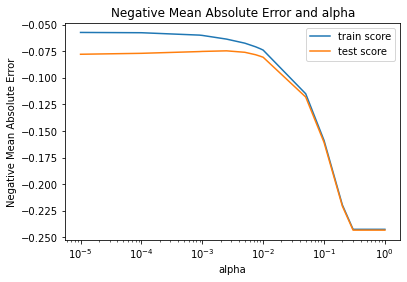

In [94]:
# Plotting the mean test and train scores for various alpha 
model_cv_lasso_results['param_alpha'] = model_cv_lasso_results['param_alpha'].astype('float64')

# plotting
plt.plot(model_cv_lasso_results['param_alpha'], model_cv_lasso_results['mean_train_score'])
plt.plot(model_cv_lasso_results['param_alpha'], model_cv_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### 4.3.1 Building the Lasso regression model with best alpha value

In [95]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)

[ 4.39698892e-03  1.38859533e-02  6.71139761e-02  2.10460791e-02
  5.77178896e-03  1.33970351e-02 -6.48179423e-03  8.15985303e-02
  6.84558352e-02  3.94290615e-03  7.95976397e-03  1.13142223e-02
 -0.00000000e+00  1.26777694e-02  1.09393013e-02  2.78543706e-02
  8.78237575e-03  5.58516301e-03 -0.00000000e+00 -2.20141184e-02
 -1.72867946e-02 -0.00000000e+00 -7.04534127e-03 -5.85426105e-03
  4.29754798e-03  0.00000000e+00  0.00000000e+00 -2.00861091e-03
 -7.02130119e-03 -2.03687363e-02 -0.00000000e+00 -1.30574009e-02
  2.93685548e-03 -3.70449001e-03  1.09902707e-02 -0.00000000e+00
  2.29480410e-02 -0.00000000e+00  2.81111101e-03 -0.00000000e+00
  0.00000000e+00  4.56706130e-03 -7.67593864e-03 -9.30516361e-04
  0.00000000e+00  1.46480829e-03  8.66413683e-03  7.00059614e-04
  0.00000000e+00  2.53120391e-02 -1.31077984e-02 -4.42369910e-04
  3.97740731e-03 -2.41550295e-03 -2.71317620e-03 -1.05354651e-02
 -0.00000000e+00  5.19748093e-04  5.38335345e-03  1.07855178e-02
 -6.66828074e-03  0.00000

**Most important predictor variables from the model**

In [96]:
lasso_1 = pd.DataFrame(list(zip(X_train.columns.values, lasso.coef_)), columns=['Features', 'Coefficients'])

lasso_1['Abs_Coeffcients'] = lasso_1['Coefficients'].apply(lambda x: abs(x))

lasso_1 = lasso_1.sort_values(by='Abs_Coeffcients', ascending = False)
lasso_1.head()

,Features,Coefficients,Abs_Coeffcients
7,TotalBsmtSF,0.081599,0.081599
8,2ndFlrSF,0.068456,0.068456
2,OverallQual,0.067114,0.067114
15,GarageArea,0.027854,0.027854
49,Neighborhood_Crawfor,0.025312,0.025312


In [97]:
#Number of features with non-zero coefficient
lasso_1 = lasso_1[lasso_1.Coefficients != 0]
lasso_1.shape

(116, 3)

In [98]:
# Predicted values on the train and test datasets
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [99]:
#Fetch the metrics
m3 = metrics(y_train, y_pred_train, y_test, y_pred_test)
print(m3)

{'R-squared train': 0.9219143316044234, 'R-squared test': 0.8774164983919944, 'RSS train': 5.314608159013529, 'RSS test': 3.3267041626286145, 'MSE train': 0.0827037335345748, 'MSE test': 0.09980076203956804}


In [100]:
# Coefficient values of features for different models
betas = pd.DataFrame(index=X_train.columns)

betas.rows = X_train.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head(10)

,Linear,Ridge,Lasso
LotFrontage,0.003455,0.006897,0.004397
LotArea,0.014757,0.013614,0.013886
OverallQual,0.055636,0.051877,0.067114
OverallCond,0.023718,0.017135,0.021046
MasVnrArea,0.006071,0.008937,0.005772
BsmtFinSF1,0.002364,0.018518,0.013397
BsmtUnfSF,-0.015246,0.003495,-0.006482
TotalBsmtSF,0.086380,0.050699,0.081599
2ndFlrSF,0.088969,0.030999,0.068456
BsmtFullBath,0.002372,0.005958,0.003943


In [101]:
# Metrics of R2, MSE and RSS for different models
metric = pd.DataFrame(index=m1.keys())

metric.rows = m1.keys()

metric['Linear'] = m1.values()
metric['Ridge'] = m2.values()
metric['Lasso'] = m3.values()
metric

,Linear,Ridge,Lasso
R-squared train,9.278753e-01,0.918264,0.921914
R-squared test,-9.770054e+20,0.871401,0.877416
RSS train,4.908896e+00,5.563047,5.314608
RSS test,2.651424e+22,3.489944,3.326704
MSE train,7.948431e-02,0.084615,0.082704
MSE test,8.909767e+09,0.102220,0.099801


In [102]:
# Calculating the adjusted R2 value
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2_lm = 1 - (1 - metric['Linear'].get('R-squared test'))*(n-1)/(n-p-1)
adj_r2_rd = 1 - (1 - metric['Ridge'].get('R-squared test'))*(n-1)/(n-p-1)
adj_r2_ls = 1 - (1 - metric['Lasso'].get('R-squared test'))*(n-1)/(n-p-1)

metric.loc['Adjusted R-squared']  = [adj_r2_lm , adj_r2_rd, adj_r2_ls]

metric

,Linear,Ridge,Lasso
R-squared train,9.278753e-01,0.918264,0.921914
R-squared test,-9.770054e+20,0.871401,0.877416
RSS train,4.908896e+00,5.563047,5.314608
RSS test,2.651424e+22,3.489944,3.326704
MSE train,7.948431e-02,0.084615,0.082704
MSE test,8.909767e+09,0.102220,0.099801
Adjusted R-squared,-1.848539e+21,0.756686,0.768066


**Inferences:**

1. Post performing regularisation using Ridge and Lasso regression techniques, the complexity of the model got reduced and we can see good R-squared value on test dataset.
2. Also, there is not much difference between R-squared values of train and test sets, which confirms that the model is not overfitted.
3. The optimal values of lambda are:

    Ridge regression - 100.0
    
    Lasso regression - 0.0025
4. Mean Squared Error(MSE) is least for the lasso regression mode, hence we can go ahead with Lasso regression model.
    
**While we got satisfactory numbers for the regularised models, let's apply feature reduction techniques to keep our model simple and more generalizable**

**We can observe that the adjusted R2 value is quite low as compared to R2. Hence, we need to perform feature reduction.**

### 4.4 Feature Reduction using Lasso Regression. 

**Will drop the features with coefficient value of zero.**

In [103]:
# Map the coefficients with the feature names
a = list(zip(X.columns, lasso.coef_))
a.insert(0, ('constant',lasso.intercept_))
print(a)

[('constant', 12.024699167507082), ('LotFrontage', 0.00439698891711415), ('LotArea', 0.01388595325924153), ('OverallQual', 0.06711397612786157), ('OverallCond', 0.021046079112636718), ('MasVnrArea', 0.00577178896159994), ('BsmtFinSF1', 0.013397035129140611), ('BsmtUnfSF', -0.006481794230995136), ('TotalBsmtSF', 0.08159853028932942), ('2ndFlrSF', 0.06845583516371834), ('BsmtFullBath', 0.0039429061458264225), ('FullBath', 0.007959763970843858), ('HalfBath', 0.011314222346738146), ('BedroomAbvGr', -0.0), ('TotRmsAbvGrd', 0.012677769363835828), ('Fireplaces', 0.010939301325133146), ('GarageArea', 0.02785437064794305), ('WoodDeckSF', 0.008782375748167119), ('OpenPorchSF', 0.005585163007131576), ('IsRemodelled', -0.0), ('HouseAge', -0.022014118393550827), ('MSSubClass_30', -0.01728679458579107), ('MSSubClass_40', -0.0), ('MSSubClass_45', -0.007045341271817912), ('MSSubClass_50', -0.005854261051863914), ('MSSubClass_60', 0.004297547976730407), ('MSSubClass_70', 0.0), ('MSSubClass_75', 0.0), (

In [104]:
# Get the columns with zero coefficient value
zero_cols = [i[0] for i in a if i[1] == 0]
print(zero_cols)

['BedroomAbvGr', 'IsRemodelled', 'MSSubClass_40', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_120', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_CollgCr', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'ExterQual_Gd', 'BsmtFinType1_Rec', 'HeatingQC_Po', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'GarageType_Attchd', 'GarageFinish_RFn', 'SaleCondition_Family']


Dropping the features from train and test sets.

In [105]:
X_train.drop(zero_cols, axis =1, inplace = True)

In [106]:
X_test.drop(zero_cols, axis =1, inplace = True)

### 4.5 Feature Reduction using RFE

In [107]:
# Shape
X_train.shape

(777, 116)

**While we could achieve a stable model, still there are lot many features in the model. Will reduce them using RFE technique.**

In [108]:
# Instantiate and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE to fecth the top 20 significant features
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [109]:
# Significant columns
rfe_cols = X_train.columns[rfe.support_]

In [110]:
# Update the train and test sets with the features selected from RFE
X_train = X_train[rfe_cols]
X_test = X_test[rfe_cols]
print(X_train.shape)
print(X_test.shape)

(777, 20)
(334, 20)


### 4.6 Validating model using stats model API

In [111]:
# By default stats-model passes through origin, hence adding the constant
X_train_SM = sm.add_constant(X_train)

In [112]:
#Reshaping the y-train
y_train = y_train.values.reshape(-1,1)

In [113]:
# Fitting the model and displaying VIF scores
lr_sm = sm.OLS(y_train, X_train_SM)

lr_sm_model = lr_sm.fit()
print(lr_sm_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_SM.columns
vif['VIF'] = [variance_inflation_factor(X_train_SM.values, i) for i in range(X_train_SM.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     310.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:50:31   Log-Likelihood:                 706.58
No. Observations:                 777   AIC:                            -1371.
Df Residuals:                     756   BIC:                            -1273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0257 

Dropping the feature 'KitchenQual_Gd' which has high VIF value

In [114]:
X_train_SM.drop(['KitchenQual_Gd'], axis =1, inplace = True)
X_train.drop(['KitchenQual_Gd'], axis =1, inplace = True)
X_test.drop(['KitchenQual_Gd'], axis =1, inplace = True)

In [115]:
# Rebuilding the model
lr_sm = sm.OLS(y_train, X_train_SM)

lr_sm_model = lr_sm.fit()
print(lr_sm_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_SM.columns
vif['VIF'] = [variance_inflation_factor(X_train_SM.values, i) for i in range(X_train_SM.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     322.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:50:31   Log-Likelihood:                 701.51
No. Observations:                 777   AIC:                            -1363.
Df Residuals:                     757   BIC:                            -1270.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0258 

Dropping the feature 'KitchenQual_TA' as it has high p-value i.e., making it insignificant

In [116]:
X_train_SM.drop(['KitchenQual_TA'], axis =1, inplace = True)
X_train.drop(['KitchenQual_TA'], axis =1, inplace = True)
X_test.drop(['KitchenQual_TA'], axis =1, inplace = True)

In [117]:
#Rebuilding the model
lr_sm = sm.OLS(y_train, X_train_SM)

lr_sm_model = lr_sm.fit()
print(lr_sm_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_SM.columns
vif['VIF'] = [variance_inflation_factor(X_train_SM.values, i) for i in range(X_train_SM.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     340.0
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:50:31   Log-Likelihood:                 700.28
No. Observations:                 777   AIC:                            -1363.
Df Residuals:                     758   BIC:                            -1274.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0259 

All the features in our model are now significant and doesn't have much collinearity with other independent features.

### 4.7 Residual Analysis

In [118]:
y_train_pred = lr_sm_model.predict(X_train_SM)
y_train_pred = y_train_pred.values.reshape(-1,1)

In [119]:
residuals = y_train - y_train_pred

#### 4.7.1 Error Terms are Normally Distributed 

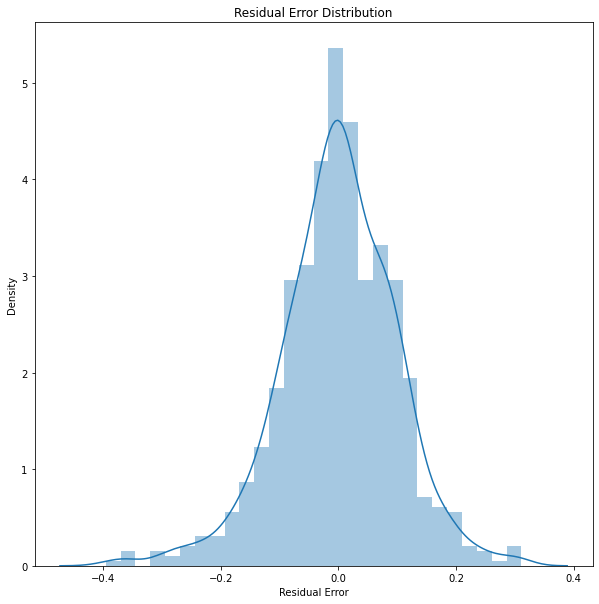

In [120]:
plt.figure(figsize=(10,10))
sns.distplot(residuals)
plt.xlabel('Residual Error')
plt.title('Residual Error Distribution')
plt.show()

#### 4.7.2 Homoscedasticity - Probability distribution of errors has constant variance

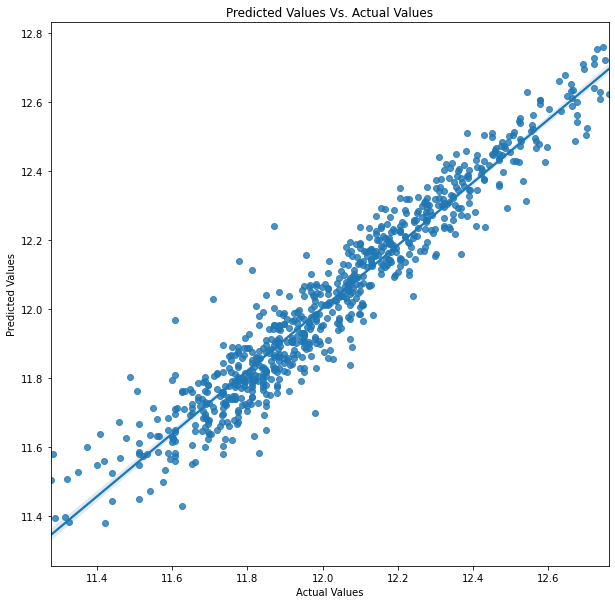

In [121]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_train, y=y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values Vs. Actual Values')
plt.show()

#### 4.7.3 Error Terms are Independent

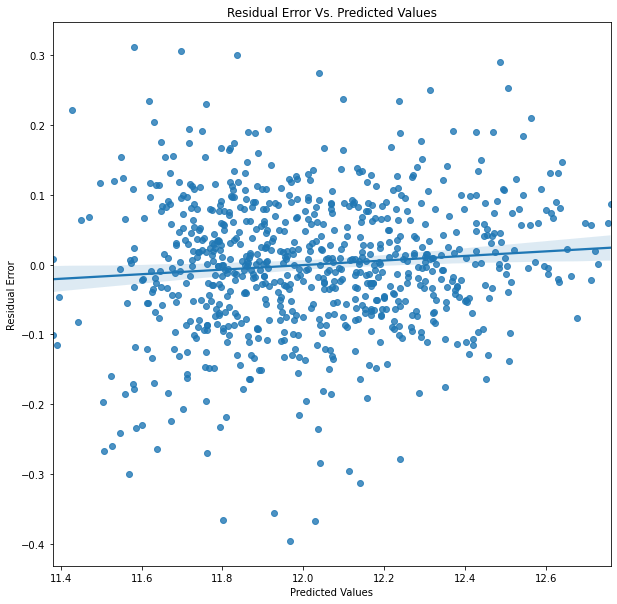

In [122]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_pred_train, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residual Error')
plt.title('Residual Error Vs. Predicted Values')
plt.show()

#### 4.7.4 Multicollinearity (low association between predictor variables)

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                Features   VIF
14      Foundation_PConc  4.70
13     Foundation_CBlock  3.72
0            OverallQual  2.61
3            TotalBsmtSF  2.46
15           BsmtQual_TA  2.22
7               HouseAge  2.07
17      GarageFinish_Unf  1.78
4               2ndFlrSF  1.78
6             GarageArea  1.56
10           MSZoning_RL  1.53
1            OverallCond  1.51
12  Neighborhood_Somerst  1.40
2              BsmtUnfSF  1.34
5             Fireplaces  1.32
8          MSSubClass_90  1.23
11  Neighborhood_Crawfor  1.21
9         MSSubClass_160  1.14
16        KitchenQual_Fa  1.07


### 4.8 Building the LR, Ridge and Lasso regression models with finalized features

**Linear Regression model**

In [124]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)
# Predicted values on the train and test datasets
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [125]:
y_test = y_test.ravel()

In [126]:
# Function to derive the metrics
def metrics2(y_train, y_pred_train, y_test, y_pred_test):
    metric = {}
    r2_train_lr = r2_score(y_train, y_pred_train)
    metric['R-squared train'] = r2_train_lr
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    metric['R-squared test'] = r2_test_lr

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    metric['MSE train'] = mse_train_lr**0.5
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric['MSE test'] = mse_test_lr**0.5
    
    return metric

In [127]:
#Fetch the metrics
m4 = metrics2(y_train, y_pred_train, y_test, y_pred_test)
print(m4)

{'R-squared train': 0.8897904278804644, 'R-squared test': 0.8489995415771269, 'MSE train': 0.0982537438433852, 'MSE test': 0.11076612910070138}


**Ridge Regression**

In [128]:
# List of alphas to tune our model
# Higher value of alpha will lead to underfitting, 
# Lower value of alpha will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# Fit the model
model_cv_ridge.fit(X_train, y_train) 

print(model_cv_ridge.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 9.0}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


In [129]:
# Fit the model
alpha = 9.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 0.08680786  0.02676526 -0.03701095  0.11494281  0.09720063  0.02519566
   0.03794522 -0.03036108 -0.01707796 -0.02105522  0.03083542  0.02573542
   0.03057978  0.02700403  0.05079437 -0.01467024 -0.0103309  -0.02169932]]


In [130]:
# Predicted values on the train and test datasets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [131]:
ridge_2 = pd.DataFrame(list(zip(X_train.columns.values, ridge.coef_[0])), columns=['Features', 'Coefficients'])

ridge_2['Abs_Coeffcients'] = ridge_2['Coefficients'].apply(lambda x: abs(x))

ridge_2 = ridge_2.sort_values(by='Abs_Coeffcients', ascending = False)
# Top 5 significant features
ridge_2.head()

,Features,Coefficients,Abs_Coeffcients
3,TotalBsmtSF,0.114943,0.114943
4,2ndFlrSF,0.097201,0.097201
0,OverallQual,0.086808,0.086808
14,Foundation_PConc,0.050794,0.050794
6,GarageArea,0.037945,0.037945


In [132]:
#Fetch the metrics
m5 = metrics2(y_train, y_pred_train, y_test, y_pred_test)
print(m5)

{'R-squared train': 0.8896595930727683, 'R-squared test': 0.8493472613543694, 'MSE train': 0.09831204729427842, 'MSE test': 0.11063852097003132}


**Lasso Regression**

In [133]:
# List of alphas to tune our model
# Higher value of alpha will lead to underfitting, 
# Lower value of alpha will not handle the overfitting
lasso = Lasso()

params = {'alpha': [0.00001,0.0001, 0.0009, 0.001, 0.0025, 0.005, 0.0075, 0.009, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# Fit the model
model_cv_lasso.fit(X_train, y_train) 

print(model_cv_lasso.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 0.0001}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [134]:
# Fit the model
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)

[ 0.08733929  0.02755399 -0.03820965  0.11841912  0.09986005  0.02428566
  0.03712355 -0.03001406 -0.01761974 -0.02134389  0.03044378  0.02591204
  0.03069005  0.02930736  0.05327316 -0.01417923 -0.0100682  -0.02086018]


In [135]:
# Predicted values on the train and test datasets
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [136]:
lasso_2 = pd.DataFrame(list(zip(X_train.columns.values, lasso.coef_)), columns=['Features', 'Coefficients'])

lasso_2['Abs_Coeffcients'] = lasso_2['Coefficients'].apply(lambda x: abs(x))

lasso_2 = lasso_2.sort_values(by='Abs_Coeffcients', ascending = False)
lasso_2.head()

,Features,Coefficients,Abs_Coeffcients
3,TotalBsmtSF,0.118419,0.118419
4,2ndFlrSF,0.099860,0.099860
0,OverallQual,0.087339,0.087339
14,Foundation_PConc,0.053273,0.053273
2,BsmtUnfSF,-0.038210,0.038210


In [137]:
#Fetch the metrics
m6 = metrics2(y_train, y_pred_train, y_test, y_pred_test)
print(m6)

{'R-squared train': 0.8897875363944452, 'R-squared test': 0.8490907582752956, 'MSE train': 0.09825503273988388, 'MSE test': 0.11073266811984846}


**Coefficient values of features for different models**

In [138]:
betas = pd.DataFrame(index=X_train.columns)

betas.rows = X_train.columns

betas['Linear'] = lm.coef_[0]
betas['Ridge'] = ridge.coef_[0]
betas['Lasso'] = lasso.coef_
betas.head(20)

,Linear,Ridge,Lasso
OverallQual,0.087288,0.086808,0.087339
OverallCond,0.027773,0.026765,0.027554
BsmtUnfSF,-0.038337,-0.037011,-0.038210
TotalBsmtSF,0.118645,0.114943,0.118419
2ndFlrSF,0.100101,0.097201,0.099860
Fireplaces,0.024268,0.025196,0.024286
GarageArea,0.037112,0.037945,0.037124
HouseAge,-0.029956,-0.030361,-0.030014
MSSubClass_90,-0.017745,-0.017078,-0.017620
MSSubClass_160,-0.021499,-0.021055,-0.021344


**As we can see, the coefficients value from different models are almost the same.**

**Metrics of R2, MSE and Adj. R2 for different models**

In [139]:
metric = pd.DataFrame(index=m4.keys())

metric.rows = m1.keys()

metric['Linear'] = m4.values()
metric['Ridge'] = m5.values()
metric['Lasso'] = m6.values()
metric

,Linear,Ridge,Lasso
R-squared train,0.889790,0.889660,0.889788
R-squared test,0.849000,0.849347,0.849091
MSE train,0.098254,0.098312,0.098255
MSE test,0.110766,0.110639,0.110733


In [140]:
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2_lm = 1 - (1 - metric['Linear'].get('R-squared test'))*(n-1)/(n-p-1)
adj_r2_rd = 1 - (1 - metric['Ridge'].get('R-squared test'))*(n-1)/(n-p-1)
adj_r2_ls = 1 - (1 - metric['Lasso'].get('R-squared test'))*(n-1)/(n-p-1)

In [141]:
metric.loc['Adjusted R-squared']  = [adj_r2_lm , adj_r2_rd, adj_r2_ls]

In [142]:
metric

,Linear,Ridge,Lasso
R-squared train,0.889790,0.889660,0.889788
R-squared test,0.849000,0.849347,0.849091
MSE train,0.098254,0.098312,0.098255
MSE test,0.110766,0.110639,0.110733
Adjusted R-squared,0.840371,0.840739,0.840467


**Observations:**

**1. As we can see from the above table, model with Ridge regularisation gave the least MSE and highest R-squared values for the train set. Hence, lets choose the coefficients derived from this model.**

**2. For all the approaches, the R2 value for both train and test sets are relatively close. Hence, we have avoided overfitting the model.**

**3. Adjusted R-squared value is also very close to R-squared, hence we chose the limited/right number of features for our model.**

### 4.9 Final Model

**Final Features and their coefficients** - (in the order of their importance)

Model with Ridge regularisation gave the least MSE and highest R-squared values for the train set. Hence, lets choose the coefficients derived from this model.

In [143]:
ridge_2

,Features,Coefficients,Abs_Coeffcients
3,TotalBsmtSF,0.114943,0.114943
4,2ndFlrSF,0.097201,0.097201
0,OverallQual,0.086808,0.086808
14,Foundation_PConc,0.050794,0.050794
6,GarageArea,0.037945,0.037945
2,BsmtUnfSF,-0.037011,0.037011
10,MSZoning_RL,0.030835,0.030835
12,Neighborhood_Somerst,0.030580,0.030580
7,HouseAge,-0.030361,0.030361
13,Foundation_CBlock,0.027004,0.027004


**Constant**

In [144]:
ridge.intercept_

array([12.02586342])

**Linear Equation representing the model (Equation for the best fitted line)**

**log(SalePrice) = 12.025863 + 0.114943 * TotalBsmtSF + 0.097201 * 2ndFlrSF + 0.086808 * OverallQual + 0.050794 * Foundation_PConc + 0.037945 * GarageArea - 0.037011 * BsmtUnfSF + 0.030835 * MSZoning_RL + 0.030580 * Neighborhood_Somerst - 0.030361 * HouseAge + 0.027004 * Foundation_CBlock + 0.026765 * OverallCond + 0.025735 * Neighborhood_Crawfor + 0.025196 * Fireplaces - 0.021699 * GarageFinish_Unf - 0.021055 * MSSubClass_160 - 0.017078 * MSSubClass_90 - 0.014670 * BsmtQual_TA - 0.010331 * KitchenQual_Fa**

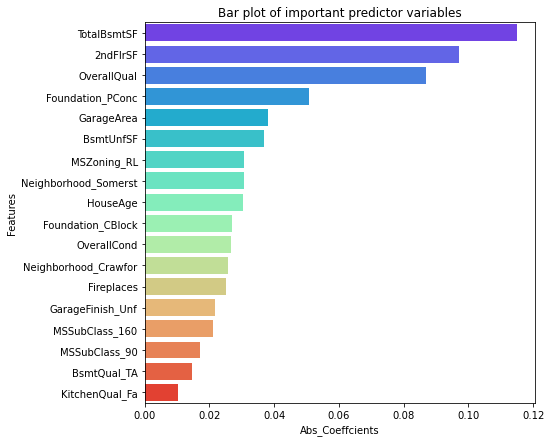

In [145]:
# Bar plot of the variables that would affect pricing most

plt.figure(figsize=(7,7))
sns.barplot(y = 'Features', x='Abs_Coeffcients', palette='rainbow', data = ridge_2)
plt.title('Bar plot of important predictor variables')
plt.show()

**Below are the numbers which tells how well the model describes the price of the house**

In [146]:
metric['Ridge']

R-squared train       0.889660
R-squared test        0.849347
MSE train             0.098312
MSE test              0.110639
Adjusted R-squared    0.840739
Name: Ridge, dtype: float64

### Optimal values of lambda for Ridge and Lasso regression

**The optimal values of lambda when built on the complete prepared dataset is:**

**Ridge regression - 100.0**

**Lasso regression - 0.0025**

**The optimal values of lambda post feature reduction is:**

**Ridge regression - 9.0**

**Lasso regression - 0.0001**

**Inferences:**

**1. 'TotalBsmtSF', '2ndFlrSF', 'OverallQual', 'Foundation_PConc','GarageArea' are the top 5 most important predictor variables.**

**2. 'TotalBsmtSF', '2ndFlrSF', 'OverallQual', 'Foundation_PConc','GarageArea', 'MSZoning_RL', 'Neighborhood_Somerst','Foundation_CBlock', 'OverallCond', 'Neighborhood_Crawfor','Fireplaces' - have positive coefficients i.e., they are positively correlated with sale price. Sale price increases with the increase of these independent features.**

**3. 'BsmtUnfSF', 'HouseAge', 'GarageFinish_Unf', 'MSSubClass_160','MSSubClass_90', 'BsmtQual_TA', 'KitchenQual_Fa' - have negative coefficients i.e., they are negatively correlated with sale price. Sale price decreases with the increase of these independent features.**

**4. As these 18 features explain about 89% variance(R2) in the data(which is a good number), we can finalize on these features.**

## Subjective Questions

Q1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [148]:
# List of alphas to tune our model
# Higher value of alpha will lead to underfitting, 
# Lower value of alpha will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# Fit the model
model_cv_ridge.fit(X_train, y_train) 

# Best value of alpha for the model
print(model_cv_ridge.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 100}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


**Building Ridge regression model with optimal alpha**

In [149]:
alpha = 100.0
ridge_100 = Ridge(alpha=alpha)

ridge_100.fit(X_train, y_train)

ridge_one = pd.DataFrame(list(zip(X_train.columns.values, ridge_100.coef_)), columns=['Features', 'Coefficients'])

ridge_one['Abs_Coeffcients'] = ridge_one['Coefficients'].apply(lambda x: abs(x))

ridge_one = ridge_one.sort_values(by='Abs_Coeffcients', ascending = False)
#print(ridge_one.head(10))

# Calculate the predicted values
y_pred_train = ridge_100.predict(X_train)
y_pred_test = ridge_100.predict(X_test)

#Fetch the metrics
m_100 = metrics2(y_train, y_pred_train, y_test, y_pred_test)

**Rebuilding the Ridge regression moidel with double the alpha**

In [150]:
alpha = 200.0
ridge_200 = Ridge(alpha=alpha)

ridge_200.fit(X_train, y_train)

ridge_double = pd.DataFrame(list(zip(X_train.columns.values, ridge_200.coef_)), columns=['Features', 'Coefficients'])

ridge_double['Abs_Coeffcients'] = ridge_double['Coefficients'].apply(lambda x: abs(x))

ridge_double = ridge_double.sort_values(by='Abs_Coeffcients', ascending = False)
#print(ridge_double.head(10))

# Calculate the predicted values
y_pred_train = ridge_200.predict(X_train)
y_pred_test = ridge_200.predict(X_test)

#Fetch the metrics
m_200 = metrics2(y_train, y_pred_train, y_test, y_pred_test)

In [151]:
lasso = Lasso()

params = {'alpha': [0.00001,0.0001, 0.0009, 0.001, 0.0025, 0.005, 0.0075, 0.009, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#Fit the model
model_cv_lasso.fit(X_train, y_train) 

print(model_cv_lasso.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 0.0025}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


**Building Lasso regression model with optimal alpha**

In [152]:
alpha =0.0025

lasso_0025 = Lasso(alpha=alpha)
        
lasso_0025.fit(X_train, y_train) 

lasso_one = pd.DataFrame(list(zip(X_train.columns.values, lasso_0025.coef_)), columns=['Features', 'Coefficients'])

lasso_one['Abs_Coeffcients'] = lasso_one['Coefficients'].apply(lambda x: abs(x))

lasso_one = lasso_one.sort_values(by='Abs_Coeffcients', ascending = False)
#print(lasso_one.head(10))

# Calculate the predicted values
y_pred_train = lasso_0025.predict(X_train)
y_pred_test = lasso_0025.predict(X_test)

# Fetch the metrics
m_0025 = metrics2(y_train, y_pred_train, y_test, y_pred_test)

**Rebuilding the Lasso regression moidel with double the alpha**

In [153]:
alpha =0.005

lasso_005 = Lasso(alpha=alpha)
        
lasso_005.fit(X_train, y_train) 

lasso_double = pd.DataFrame(list(zip(X_train.columns.values, lasso_005.coef_)), columns=['Features', 'Coefficients'])

lasso_double['Abs_Coeffcients'] = lasso_double['Coefficients'].apply(lambda x: abs(x))

lasso_double = lasso_double.sort_values(by='Abs_Coeffcients', ascending = False)
#print(lasso_double.head(10))

# Calculate the predicted values
y_pred_train = lasso_005.predict(X_train)
y_pred_test = lasso_005.predict(X_test)

# Fetch the metrics
m_005 = metrics2(y_train, y_pred_train, y_test, y_pred_test)

**Metrics of R2, MSE and Adj. R2 for different models**

In [154]:
metric = pd.DataFrame(index=m_100.keys())

metric.rows = m_100.keys()

n = X_test.shape[0]
p = X_test.shape[1]



metric['Ridge_100'] = m_100.values()
metric['Ridge_200'] = m_200.values()
metric['Lasso_0025'] = m_0025.values()
metric['Lasso_005'] = m_005.values()

adj_r2_rd_100 = 1 - (1 - metric['Ridge_100'].get('R-squared test'))*(n-1)/(n-p-1)
adj_r2_rd_200 = 1 - (1 - metric['Ridge_200'].get('R-squared test'))*(n-1)/(n-p-1)
adj_r2_ls_0025 = 1 - (1 - metric['Lasso_0025'].get('R-squared test'))*(n-1)/(n-p-1)
adj_r2_ls_005 = 1 - (1 - metric['Lasso_005'].get('R-squared test'))*(n-1)/(n-p-1)

metric.loc['Adjusted R-squared']  = [adj_r2_rd_100 , adj_r2_rd_200, adj_r2_ls_0025, adj_r2_ls_005]

metric

,Ridge_100,Ridge_200,Lasso_0025,Lasso_005
R-squared train,0.918264,0.911787,0.914568,0.905229
R-squared test,0.871401,0.865117,0.871246,0.862797
MSE train,0.084615,0.087904,0.086507,0.091112
MSE test,0.102220,0.104688,0.102282,0.105585
Adjusted R-squared,0.756686,0.744796,0.756392,0.740405


In [155]:
key_features = metric = pd.DataFrame(list(zip(ridge_one['Features'].head(10).values, ridge_double['Features'].head(10).values, lasso_one['Features'].head(10).values, lasso_double['Features'].head(10).values)), columns=['Ridge_100','Ridge_200','Lasso_0025', 'Lasso_005'])

**Significant features(top 10) for different models**

In [156]:
key_features

,Ridge_100,Ridge_200,Lasso_0025,Lasso_005
0,OverallQual,OverallQual,OverallQual,OverallQual
1,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF
2,2ndFlrSF,GarageArea,2ndFlrSF,2ndFlrSF
3,GarageArea,2ndFlrSF,GarageArea,GarageArea
4,Neighborhood_Crawfor,Neighborhood_Crawfor,HouseAge,HouseAge
5,Foundation_PConc,TotRmsAbvGrd,Neighborhood_Crawfor,BsmtFinSF1
6,HouseAge,BsmtFinSF1,BsmtFinSF1,Neighborhood_Crawfor
7,BsmtQual_TA,HouseAge,OverallCond,MSSubClass_90
8,TotRmsAbvGrd,MSSubClass_30,Neighborhood_Somerst,MSSubClass_30
9,MSSubClass_30,FullBath,Foundation_PConc,LotArea


**Question 3:**

**Top 5 predictor variables in lasso model**

In [157]:
lasso_one['Features'].head(5).values

array(['OverallQual', 'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'HouseAge'],
      dtype=object)

In [158]:
# Dropping the top 5 predictor variables from test and train datasets
X_train.drop(['OverallQual', 'TotalBsmtSF', 'GarageArea', 'HouseAge', '2ndFlrSF'], axis =1, inplace = True)
X_test.drop(['OverallQual', 'TotalBsmtSF', 'GarageArea', 'HouseAge', '2ndFlrSF'], axis =1, inplace = True)

In [159]:
lasso = Lasso()

params = {'alpha': [0.00001,0.0001, 0.0009, 0.001, 0.005, 0.0075, 0.009, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

print(model_cv_lasso.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.001}


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.3s finished


**Build lasso regression model with new features**

In [160]:
alpha =0.001

lasso_five = Lasso(alpha=alpha)
        
lasso_five.fit(X_train, y_train) 

lasso_remove_five = pd.DataFrame(list(zip(X_train.columns.values, lasso_five.coef_)), columns=['Features', 'Coefficients'])

lasso_remove_five['Abs_Coeffcients'] = lasso_remove_five['Coefficients'].apply(lambda x: abs(x))

lasso_remove_five = lasso_remove_five.sort_values(by='Abs_Coeffcients', ascending = False)
#print(lasso_one.head(10))

# Calculate the preicted values
y_pred_train = lasso_five.predict(X_train)
y_pred_test = lasso_five.predict(X_test)

# Fetch the metrics
m_lasso_five = metrics2(y_train, y_pred_train, y_test, y_pred_test)

In [161]:
# List of alphas to tune our model
# Higher value of alpha will lead to underfitting, 
# Lower value of alpha will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# Fit the model
model_cv_ridge.fit(X_train, y_train) 

# Best value of alpha for the model
print(model_cv_ridge.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 100}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


**Build Ridge regression model with new features**

In [162]:
alpha = 100.0
ridge_five = Ridge(alpha=alpha)

ridge_five.fit(X_train, y_train)

ridge_remove_five = pd.DataFrame(list(zip(X_train.columns.values, ridge_five.coef_)), columns=['Features', 'Coefficients'])

ridge_remove_five['Abs_Coeffcients'] = ridge_remove_five['Coefficients'].apply(lambda x: abs(x))

ridge_remove_five = ridge_remove_five.sort_values(by='Abs_Coeffcients', ascending = False)
#print(ridge_one.head(10))

y_pred_train = ridge_five.predict(X_train)
y_pred_test = ridge_five.predict(X_test)

m_ridge_five = metrics2(y_train, y_pred_train, y_test, y_pred_test)


In [163]:
key_features_remove_five = metric = pd.DataFrame(list(zip(lasso_one['Features'].head(5).values, lasso_remove_five['Features'].head(5).values, ridge_remove_five['Features'].head(5).values)), columns=['Lasso_orig', 'Lasso_five', 'Ridge_five'])

**Top 5 important predictor variables after removing previous top features**

In [164]:
key_features_remove_five

,Lasso_orig,Lasso_five,Ridge_five
0,OverallQual,BsmtFinSF1,BsmtFinSF1
1,TotalBsmtSF,BsmtUnfSF,FullBath
2,2ndFlrSF,BsmtQual_TA,BsmtUnfSF
3,GarageArea,FullBath,TotRmsAbvGrd
4,HouseAge,TotRmsAbvGrd,BsmtQual_TA
